فراخوانی ماژول متپلات‌لیب برای تصویر سازی داده.  
فراخوانی ماژول پانداس برای کار با داده‌های جدولی.  

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

فراخوانی داده‌های لیگ اسپانیا.

In [71]:
df_laliga = pd.read_csv('LaLiga_dataset.csv')

In [12]:
df_laliga.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7


حال از شما می‌خواهیم تابعی بنویسید تا با گرفتن نام فصل جدول آن فصل را خروجی دهد.
- دقت کنید تیم‌ها در جدول یک فصل باید به ترتیب امتیاز و سپس تفاضل گل مرتب شده باشند.
- پس از نوشتن تابع با امضای (`signature`) زیر آن را در `functions.py` قرار دهید.
- دقت کنید`DataFrame` لالیگا به عنوان آرگوما اول به تابع ورودی داده می‌شود. 

In [72]:
def get_season_table(df_laliga,season_name):
    seasonTable = df_laliga[df_laliga['season'] == season_name]
    seasonTable = seasonTable.sort_values(['points','goal_difference'],ascending = False)
    return seasonTable

In [15]:
get_season_table(df_laliga,'2016-17')

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
907,2016-17,Real Madrid,14,15,1,2,29,3,6,38,93,48,58,106,41,65
906,2016-17,Barcelona,15,13,1,3,28,4,6,38,90,64,52,116,37,79
905,2016-17,Atletico de Madrid,14,9,3,3,23,6,9,38,78,40,30,70,27,43
904,2016-17,Sevilla,14,7,1,7,21,8,9,38,72,39,30,69,49,20
903,2016-17,Villarreal,11,8,4,5,19,9,10,38,67,35,21,56,33,23
902,2016-17,Real Sociedad,10,9,4,8,19,12,7,38,64,30,29,59,53,6
901,2016-17,Athletic Club,13,6,2,11,19,13,6,38,63,36,17,53,43,10
900,2016-17,Espanyol,8,7,6,6,15,12,11,38,56,28,21,49,50,-1
899,2016-17,Alaves,7,7,4,7,14,11,13,38,55,19,22,41,43,-2
898,2016-17,Eibar,10,5,6,8,15,14,9,38,54,29,27,56,51,5


ورودی و خروجی نمونه تابع را می‌توانید در زیر ببینید.

In [22]:
df = get_season_table(df_laliga,'2016-17')
df = df.iloc[0]
df[['season','club']]

season        2016-17
club      Real Madrid
Name: 907, dtype: object

پرسشی وجود دارد که ایا در همه دوره‌های لالیگا تعداد یکسانی تیم حضور داشته‌اند؟
.جواب را برای ۵ سال اولی که در داده‌ی ما وجود دارد می‌توانید در زیر مشاهده کنید

In [16]:
pd.DataFrame.from_dict({'club': {'1970-71': 16,
  '1971-72': 18,
  '1972-73': 18,
  '1973-74': 18,
  '1974-75': 18}})

,club
1970-71,16
1971-72,18
1972-73,18
1973-74,18
1974-75,18


حال از شما می‌خواهیم همین جدول را برای همه‌ی سال‌های موجود در دیتاست لالیگا تکمیل کنید و در فایل `club_count.csv` ذخیره کنید. 

In [73]:
club_count = df_laliga.groupby('season').club.size()
club_count = pd.DataFrame(club_count)
club_count.index.name = ''
club_count.to_csv('club_count.csv')

حال می‌خواهیم درباره قهرمان فصل‌های مختلف لالیگا اطلاعاتی بدست آوریم.برای همین باید ابتدا قهرمان هر فصل را مشخص کنیم.

می‌توانید در جدول زیر قهرمان ۵ فصل اخیر لالیگا را ببینید.

- دقت کنید در جدول زیر ویژگی `season` به عنوان `index` تنظیم شده

In [49]:
pd.DataFrame.from_dict({'club': {'2012-13': 'Barcelona',
  '2013-14': 'Atletico de Madrid',
  '2014-15': 'Barcelona',
  '2015-16': 'Barcelona',
  '2016-17': 'Real Madrid'}})

,club
2012-13,Barcelona
2013-14,Atletico de Madrid
2014-15,Barcelona
2015-16,Barcelona
2016-17,Real Madrid


حال این جدول را برای همه فصل‌های موجود در داد تکمیل کنید و در فایل `champions.csv` ذخیره کنید.
- دقت کنید که جدولی که ذحیره می‌کنید قالب یکسانی با جدول نمونه ارائه شده در بالا داشته باشد.

In [74]:
seasons = df_laliga['season'].unique()
champions = pd.DataFrame(columns = ['season','club'])
for ss in seasons:
    df_season = get_season_table(df_laliga,ss)
    df_season = df_season.sort_values('points',ascending = False)
    df_season = df_season.iloc[0]
    champions = champions.append(df_season[['season','club']])
champions = champions.set_index('season')
champions.index.name = ''
champions.to_csv('champions.csv')

حال بر اساس جدول تکمیل شده در بخش قبلی، تعداد قهرمانی‌های هر تیم را بدست آورید و در متغیر `championship_count` قرار دهید.

In [75]:
championship_count = champions.groupby('club').size()
championship_count = championship_count.sort_values(ascending = False)

می‌بینید که فقط ۷ تیم تا به حال قهرمان لالیگا شده‌اند!

حال با استفاده‌از کد زیر و نتیجه‌ی بخش قبل می‌توانید نمودار تعداد قهرمانی‌های هر تیم را ببینید.

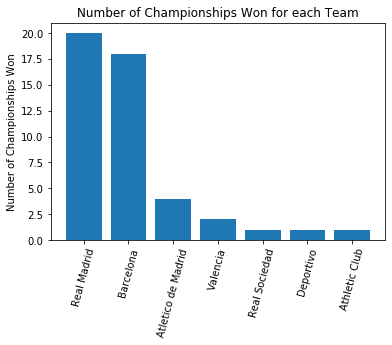

In [76]:
pd.DataFrame(championship_count).rename(columns={'club':'count'}).to_csv('championship_count.csv')
plt.figure()
plt.title('Number of Championships Won for each Team')

plt.bar( championship_count.index, championship_count.values )

plt.ylabel('Number of Championships Won')
plt.xticks(rotation = 75)
plt.show()

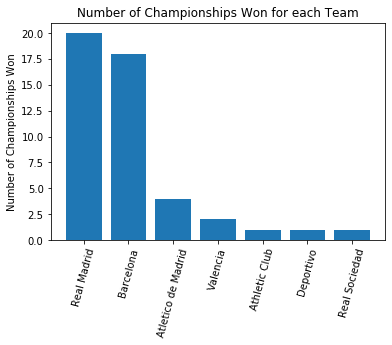

 حال با نگاه به نمودار بالا می‌توانید اختلاف دو تیم اول با بقیه را ببینید. در اینجا مشخص می‌شود که لیگ اسپانیا تا چه حد **دو قطبی** است.

حال پس از ذخیره کردن این نوت‌بوک، **ارسال پاسخ** را انتخاب کنید تا فایل‌های مورد نیاز را زیپ کرده و ارسال کند